In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

In [2]:
tweet_data=pd.read_csv(r'C:\Users\DELL\Downloads\tweet_data.csv')


In [3]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sentiment   100 non-null    object 
 1   text        100 non-null    object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  1 non-null      object 
 4   Unnamed: 4  1 non-null      object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


In [4]:
tweet_data.isna().sum()

sentiment       0
text            0
Unnamed: 2    100
Unnamed: 3     99
Unnamed: 4     99
dtype: int64

In [5]:
tweets=tweet_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
## tweets=tweet_data[['sentiment','text']]

In [6]:
tweets.head()

,sentiment,text
0,neutral,"Get Premium Tools and content , Upgrade to VIP..."
1,neutral,RT @PinakiLaskar: #datascience job roles. How ...
2,neutral,RT @throttlefix: botnet fuerte\n https://t.co/...
3,neutral,RT @HaroldSinnott: 😱 #MachineLearning App Idea...
4,neutral,RT @PinakiLaskar: STEPS TO KICK OFF YOUR DATA ...


In [7]:
neutral_tweets=tweets[tweets['sentiment']=='neutral']

In [8]:
neutral_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  56 non-null     object
 1   text       56 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [9]:
neutral_text=' '.join(neutral_tweets['text'])
neutral_text

'Get Premium Tools and content , Upgrade to VIP https://t.co/HatjFbJ4LX\\n\\n#bigdata \\n#ViVAtech2021\\n#DEVCommunity… https://t.co/3DkaMxpekL RT @PinakiLaskar: #datascience job roles. How to make money with your #programming skills\\n\\n#BigData #Analytics #DataScience #IoT #IIoT #RSt… RT @throttlefix: botnet fuerte\\n https://t.co/hFtuP0LaV9\\n\\n#bigdata \\n#ViVAtech2021\\n#DEVCommunity #teChnOlOgy #Programming #AI #iioT #100DaysO… RT @HaroldSinnott: 😱 #MachineLearning App Ideas 2021\\n\\nvia @ValueCoders\\nhttps://t.co/9FngS1ycMQ\\n\\n#AI #5G #Healthcare #SmartCity #FutureofWor… RT @PinakiLaskar: STEPS TO KICK OFF YOUR DATA SCIENCE LEARNING PATH\\n\\n#MachineLearning #BigData #Analytics #DataScience #IoT #IIoT #Python #… RT @PinakiLaskar: STEPS TO KICK OFF YOUR DATA SCIENCE LEARNING PATH\\n\\n#MachineLearning #BigData #Analytics #DataScience #IoT #IIoT #Python #… RT @BotPoetsSociety: Can you guess the #poem that is human and the one created by #MachineLearning ?\\n\\n #machinelear

In [10]:
neutral_text=neutral_text.lower()

In [11]:
import seaborn as sns

C:\DR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

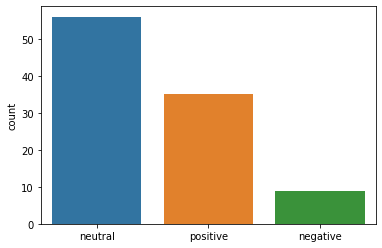

In [12]:
sns.countplot(tweet_data.values[:,0])

In [13]:
import string

In [14]:
neutral_text="".join([words for words in neutral_text if words not in string.punctuation])
neutral_text

'get premium tools and content  upgrade to vip httpstcohatjfbj4lxnnbigdata nvivatech2021ndevcommunity… httpstco3dkamxpekl rt pinakilaskar datascience job roles how to make money with your programming skillsnnbigdata analytics datascience iot iiot rst… rt throttlefix botnet fuerten httpstcohftup0lav9nnbigdata nvivatech2021ndevcommunity technology programming ai iiot 100dayso… rt haroldsinnott 😱 machinelearning app ideas 2021nnvia valuecodersnhttpstco9fngs1ycmqnnai 5g healthcare smartcity futureofwor… rt pinakilaskar steps to kick off your data science learning pathnnmachinelearning bigdata analytics datascience iot iiot python … rt pinakilaskar steps to kick off your data science learning pathnnmachinelearning bigdata analytics datascience iot iiot python … rt botpoetssociety can you guess the poem that is human and the one created by machinelearning nn machinelearning datascience  arti… botnet fuerten httpstcohftup0lav9nnbigdata nvivatech2021ndevcommunity technology programming ai iiot

In [15]:
from nltk.stem import WordNetLemmatizer

In [16]:
lemmatizer=WordNetLemmatizer()
neutral_text=lemmatizer.lemmatize(neutral_text)
neutral_text

'get premium tools and content  upgrade to vip httpstcohatjfbj4lxnnbigdata nvivatech2021ndevcommunity… httpstco3dkamxpekl rt pinakilaskar datascience job roles how to make money with your programming skillsnnbigdata analytics datascience iot iiot rst… rt throttlefix botnet fuerten httpstcohftup0lav9nnbigdata nvivatech2021ndevcommunity technology programming ai iiot 100dayso… rt haroldsinnott 😱 machinelearning app ideas 2021nnvia valuecodersnhttpstco9fngs1ycmqnnai 5g healthcare smartcity futureofwor… rt pinakilaskar steps to kick off your data science learning pathnnmachinelearning bigdata analytics datascience iot iiot python … rt pinakilaskar steps to kick off your data science learning pathnnmachinelearning bigdata analytics datascience iot iiot python … rt botpoetssociety can you guess the poem that is human and the one created by machinelearning nn machinelearning datascience  arti… botnet fuerten httpstcohftup0lav9nnbigdata nvivatech2021ndevcommunity technology programming ai iiot

In [17]:
from nltk import word_tokenize

In [18]:
neutral_text=word_tokenize(neutral_text)

In [19]:
from nltk.corpus import stopwords

In [20]:
stopwords=stopwords.words('english')
neutral_text=[words for words in neutral_text if words not in stopwords]
neutral_text

['get',
 'premium',
 'tools',
 'content',
 'upgrade',
 'vip',
 'httpstcohatjfbj4lxnnbigdata',
 'nvivatech2021ndevcommunity…',
 'httpstco3dkamxpekl',
 'rt',
 'pinakilaskar',
 'datascience',
 'job',
 'roles',
 'make',
 'money',
 'programming',
 'skillsnnbigdata',
 'analytics',
 'datascience',
 'iot',
 'iiot',
 'rst…',
 'rt',
 'throttlefix',
 'botnet',
 'fuerten',
 'httpstcohftup0lav9nnbigdata',
 'nvivatech2021ndevcommunity',
 'technology',
 'programming',
 'ai',
 'iiot',
 '100dayso…',
 'rt',
 'haroldsinnott',
 '😱',
 'machinelearning',
 'app',
 'ideas',
 '2021nnvia',
 'valuecodersnhttpstco9fngs1ycmqnnai',
 '5g',
 'healthcare',
 'smartcity',
 'futureofwor…',
 'rt',
 'pinakilaskar',
 'steps',
 'kick',
 'data',
 'science',
 'learning',
 'pathnnmachinelearning',
 'bigdata',
 'analytics',
 'datascience',
 'iot',
 'iiot',
 'python',
 '…',
 'rt',
 'pinakilaskar',
 'steps',
 'kick',
 'data',
 'science',
 'learning',
 'pathnnmachinelearning',
 'bigdata',
 'analytics',
 'datascience',
 'iot',
 'iio

In [21]:
import collections

In [22]:
counter=collections.Counter(neutral_text)
counter

Counter({'get': 4,
         'premium': 4,
         'tools': 4,
         'content': 4,
         'upgrade': 4,
         'vip': 4,
         'httpstcohatjfbj4lxnnbigdata': 1,
         'nvivatech2021ndevcommunity…': 1,
         'httpstco3dkamxpekl': 1,
         'rt': 52,
         'pinakilaskar': 9,
         'datascience': 28,
         'job': 1,
         'roles': 1,
         'make': 3,
         'money': 1,
         'programming': 3,
         'skillsnnbigdata': 1,
         'analytics': 12,
         'iot': 10,
         'iiot': 10,
         'rst…': 1,
         'throttlefix': 4,
         'botnet': 2,
         'fuerten': 2,
         'httpstcohftup0lav9nnbigdata': 5,
         'nvivatech2021ndevcommunity': 5,
         'technology': 2,
         'ai': 8,
         '100dayso…': 1,
         'haroldsinnott': 2,
         '😱': 1,
         'machinelearning': 15,
         'app': 1,
         'ideas': 1,
         '2021nnvia': 1,
         'valuecodersnhttpstco9fngs1ycmqnnai': 1,
         '5g': 1,
         'heal

In [23]:
from wordcloud import WordCloud ,STOPWORDS

In [24]:
stpwords=set(STOPWORDS)

In [25]:
stpwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [26]:
neutral_text=[words for words in neutral_text if words not in stpwords]
neutral_text

['premium',
 'tools',
 'content',
 'upgrade',
 'vip',
 'httpstcohatjfbj4lxnnbigdata',
 'nvivatech2021ndevcommunity…',
 'httpstco3dkamxpekl',
 'rt',
 'pinakilaskar',
 'datascience',
 'job',
 'roles',
 'make',
 'money',
 'programming',
 'skillsnnbigdata',
 'analytics',
 'datascience',
 'iot',
 'iiot',
 'rst…',
 'rt',
 'throttlefix',
 'botnet',
 'fuerten',
 'httpstcohftup0lav9nnbigdata',
 'nvivatech2021ndevcommunity',
 'technology',
 'programming',
 'ai',
 'iiot',
 '100dayso…',
 'rt',
 'haroldsinnott',
 '😱',
 'machinelearning',
 'app',
 'ideas',
 '2021nnvia',
 'valuecodersnhttpstco9fngs1ycmqnnai',
 '5g',
 'healthcare',
 'smartcity',
 'futureofwor…',
 'rt',
 'pinakilaskar',
 'steps',
 'kick',
 'data',
 'science',
 'learning',
 'pathnnmachinelearning',
 'bigdata',
 'analytics',
 'datascience',
 'iot',
 'iiot',
 'python',
 '…',
 'rt',
 'pinakilaskar',
 'steps',
 'kick',
 'data',
 'science',
 'learning',
 'pathnnmachinelearning',
 'bigdata',
 'analytics',
 'datascience',
 'iot',
 'iiot',
 'py

In [27]:
count=counter.most_common(20)
headers=['word','count']

In [28]:
count=pd.DataFrame(count)
count

,0,1
0,rt,52
1,datascience,28
2,machinelearning,15
3,learning,13
4,bigdata,13
5,…,13
6,analytics,12
7,data,12
8,iot,10
9,iiot,10


In [29]:
count.columns=['words','count']

In [30]:
count

,words,count
0,rt,52
1,datascience,28
2,machinelearning,15
3,learning,13
4,bigdata,13
5,…,13
6,analytics,12
7,data,12
8,iot,10
9,iiot,10


In [ ]:
count.set_index('words')

In [ ]:
count.reset_index()

In [ ]:
count.set_index('index')

In [ ]:
count.info()

In [ ]:
wordcld=WordCloud().generate(neutral_text)

In [ ]:
len(neutral_text)

In [32]:
neutral_text=' '.join([words for words in neutral_text])

In [ ]:
type(neutral_text)

In [ ]:
plt.figure()
plt.imshow(wordcld)
plt.axis('off')

In [ ]:
neutral_text=re.sub('[^a-zA-Z]',' ',neutral_text)

In [34]:
neutral_text=re.findall('rt',neutral_text).remove('rt')

In [35]:
neutral_text